## OPTION1 - Using yolov8n model

Train YOLOv8 model using the standard hyperparameters, then evaluate the model on the validation dataset, and finally summarize the training results, including performance metrics and confirmation of saved checkpoints.
The training data YAML file is located at [/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml](https://)

### Setup & Installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_yaml_path = '/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml' # @param {type: "string"}
print(f"Data YAML path set to: {data_yaml_path}")

Data YAML path set to: /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml


In [ ]:
!pip install ultralytics
import ultralytics
print("Ultralytics library installed and imported successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics library installed and imported successfully.


### Load Dataset

In [ ]:
model = ultralytics.YOLO('yolov8n.pt') # Load a pre-trained YOLOv8n model
print("YOLOv8 model initialized:")
print(model.info())

YOLOv8 model initialized:
YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
(129, 3157200, 0, 8.8575488)


### Model Training

In [ ]:
# first 50 epochs (Iteration 1)
results = model.train(
    model='yolov8n.pt',
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.01,
    lrf=0.01,
    optimizer='SGD',
    weight_decay=0.0005,
    momentum=0.937,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,
    save_period=15
)
print("Training completed. Results are stored in the 'runs' directory.")

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience

In [ ]:
# Now running from epoch 51 to 150 (Iteration 2)
# Re-initialize the model with the best weights from the previous run
model_reloaded = ultralytics.YOLO('/content/runs/detect/train2/weights/best.pt')
results = model_reloaded.train(
    data=data_yaml_path,
    epochs=100,
    imgsz=640,
    batch=16,
    lr0=0.01,
    lrf=0.01,
    optimizer='SGD',
    weight_decay=0.0005,
    momentum=0.937,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,
    save_period=15
)
print("Training completed. Results are stored in the 'runs' directory.")

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train2/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimize

In [ ]:
# Now running from epoch 151 to 175 (Iteration 3)
# Re-initialize the model with the best weights from the previous run
model_reloaded2 = ultralytics.YOLO('/content/runs/detect/train4/weights/best.pt')
results = model_reloaded2.train(
    data=data_yaml_path,
    epochs=100,
    imgsz=640,
    batch=16,
    lr0=0.001, #changed
    lrf=0.01,
    optimizer='SGD',
    weight_decay=0.0005,
    momentum=0.937,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.5, #changed
    mixup=0.0,
    save_period=10
)
print("Training completed. Results are stored in the 'runs' directory.")

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train4/weights/best.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimiz

Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 270, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 427, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 384, in _send
    n = write(self._handle, buf)
        ^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 9] Bad file descriptor
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exc


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/100      2.37G     0.9956     0.8047      1.136         47        640: 100% ━━━━━━━━━━━━ 75/75 2.9it/s 26.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 2.9it/s 7.6s
                   all        702       1266      0.789      0.635        0.7      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/100      2.37G     0.9865     0.8139       1.14         41        640: 100% ━━━━━━━━━━━━ 75/75 3.1it/s 24.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 2.2it/s 10.1s
                   all        702       1266      0.778      0.648      0.699      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100      2.37G     0.9745     0.8074      1.142         31        640: 100% ━━━━━━━━━━━━

KeyboardInterrupt: 

### Model Performance (Saved Models)

In [ ]:
# Evaluate the model on the validation set - Best among first 50 epochs
metrics = model.val(data=data_yaml_path)

print("Model evaluation completed.")
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 23.2±15.6 MB/s, size: 37.0 KB)
val: Scanning /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/valid/labels.cache... 702 images, 172 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 702/702 948.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 44/44 4.7it/s 9.3s
                   all        702       1266      0.706      0.574       0.63      0.313
            dead pixel        156        217      0.627      0.442      0.511      0.205
               scratch        171        399      0.818      0.801      0.829      0.411
          screen crack        336        650      0.672      0.478      0.548      0.324
Speed: 1.6ms preprocess, 3.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/runs/detect/val2
Model evaluation completed.
mAP50-95: 0.3131134455

In [ ]:
# Evaluate the model on the validation set - Best among first 150 epochs
metrics = model_reloaded.val(data=data_yaml_path)

print("Model evaluation completed.")
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 17.3±8.8 MB/s, size: 46.1 KB)
val: Scanning /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/valid/labels.cache... 702 images, 172 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 702/702 224.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 44/44 4.2it/s 10.4s
                   all        702       1266      0.802      0.651      0.707      0.364
            dead pixel        156        217      0.836      0.544      0.625      0.261
               scratch        171        399      0.847      0.832      0.847      0.427
          screen crack        336        650      0.724      0.577      0.648      0.403
Speed: 2.1ms preprocess, 3.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved

In [ ]:
# Evaluate the model on the validation set - Best among first 225 epochs
metrics = model_reloaded2.val(data=data_yaml_path)

print("Model evaluation completed.")
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 13,065 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 47.8±20.4 MB/s, size: 102.2 KB)
val: Scanning /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/valid/labels.cache... 702 images, 172 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 702/702 851.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 44/44 3.5it/s 12.4s
                   all        702       1266      0.845      0.645      0.715      0.363
            dead pixel        156        217      0.897      0.553      0.661      0.269
               scratch        171        399      0.869      0.815       0.85      0.418
          screen crack        336        650       0.77      0.566      0.634      0.402
Speed: 1.4ms preprocess, 3.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Result

In [ ]:
import shutil
import os

source_path = '/content/runs/detect/train2'
destination_path = '/content/drive/My Drive/DBAI/train2'

# Ensure the destination directory exists
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Check if the source path exists before copying
if os.path.exists(source_path):
    # Remove existing destination if it's a directory to prevent errors
    if os.path.exists(destination_path) and os.path.isdir(destination_path):
        shutil.rmtree(destination_path)
    shutil.copytree(source_path, destination_path)
    print(f"Successfully copied '{source_path}' to '{destination_path}'")
else:
    print(f"Error: Source path '{source_path}' does not exist.")

Successfully copied '/content/runs/detect/train2' to '/content/drive/My Drive/DBAI/train2'


In [ ]:
import shutil
import os

source_path = '/content/runs/detect/train4'
destination_path = '/content/drive/My Drive/DBAI/train4'

# Ensure the destination directory exists
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Check if the source path exists before copying
if os.path.exists(source_path):
    # Remove existing destination if it's a directory to prevent errors
    if os.path.exists(destination_path) and os.path.isdir(destination_path):
        shutil.rmtree(destination_path)
    shutil.copytree(source_path, destination_path)
    print(f"Successfully copied '{source_path}' to '{destination_path}'")
else:
    print(f"Error: Source path '{source_path}' does not exist.")

Successfully copied '/content/runs/detect/train4' to '/content/drive/My Drive/DBAI/train4'


In [ ]:
import shutil
import os

source_path = '/content/runs/detect/train5'
destination_path = '/content/drive/My Drive/DBAI/train5'

# Ensure the destination directory exists
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Check if the source path exists before copying
if os.path.exists(source_path):
    # Remove existing destination if it's a directory to prevent errors
    if os.path.exists(destination_path) and os.path.isdir(destination_path):
        shutil.rmtree(destination_path)
    shutil.copytree(source_path, destination_path)
    print(f"Successfully copied '{source_path}' to '{destination_path}'")
else:
    print(f"Error: Source path '{source_path}' does not exist.")

Successfully copied '/content/runs/detect/train5' to '/content/drive/My Drive/DBAI/train5'


## OPTION2 - Using yolov8s model

Train YOLOv8 model using the standard hyperparameters, then evaluate the model on the validation dataset, and finally summarize the training results, including performance metrics and confirmation of saved checkpoints.
The training data YAML file is located at [/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml](https://)

### Setup & Installation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_yaml_path = '/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml' # @param {type: "string"}
print(f"Data YAML path set to: {data_yaml_path}")

Data YAML path set to: /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml


In [3]:
!pip install ultralytics
import ultralytics
print("Ultralytics library installed and imported successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics library installed and imported successfully.


### Load Dataset

In [5]:
model = ultralytics.YOLO('yolov8s.pt') # Load a pre-trained YOLOv8n model
print("YOLOv8 model initialized:")
print(model.info())

YOLOv8 model initialized:
YOLOv8s summary: 129 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs
(129, 11166560, 0, 28.816844800000002)


### Model Training

In [6]:
# first 50 epochs (Iteration 1)
results = model.train(
    model='yolov8s.pt',
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.01,
    lrf=0.01,
    optimizer='SGD',
    weight_decay=0.0005,
    momentum=0.937,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,
    save_period=10
)
print("Training completed. Results are stored in the 'runs' directory.")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=

In [9]:
# Now running from epoch 51 to 150 (Iteration 2)
# Re-initialize the model with the best weights from the previous run
model_reloaded = ultralytics.YOLO('/content/runs/detect/train/weights/best.pt')
results = model_reloaded.train(
    data=data_yaml_path,
    epochs=100,
    imgsz=640,
    batch=16,
    lr0=0.01,
    lrf=0.01,
    optimizer='SGD',
    weight_decay=0.0005,
    momentum=0.937,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,
    save_period=15
)
print("Training completed. Results are stored in the 'runs' directory.")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer

### Model Performance (Saved Model)

In [8]:
# Evaluate the model on the validation set - Best among first 50 epochs
metrics = model.val(data=data_yaml_path)

print("Model evaluation completed.")
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 45.1±13.0 MB/s, size: 88.8 KB)
val: Scanning /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/valid/labels.cache... 702 images, 172 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 702/702 1.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 44/44 2.9it/s 15.4s
                   all        702       1266      0.763      0.664      0.703      0.353
            dead pixel        156        217      0.723       0.59      0.607      0.257
               scratch        171        399      0.852       0.83      0.865      0.415
          screen crack        336        650      0.713      0.572      0.639      0.388
Speed: 1.9ms preprocess, 9.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results save

In [11]:
# Evaluate the model on the validation set - Best among first 150 epochs
metrics = model_reloaded.val(data=data_yaml_path)

print("Model evaluation completed.")
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 45.7±19.7 MB/s, size: 102.2 KB)
val: Scanning /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/valid/labels.cache... 702 images, 172 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 702/702 1.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 44/44 2.8it/s 15.9s
                   all        702       1266      0.826      0.655      0.713      0.384
            dead pixel        156        217      0.812      0.562      0.613      0.278
               scratch        171        399      0.844       0.82      0.846      0.427
          screen crack        336        650      0.822      0.585       0.68      0.446
Speed: 2.0ms preprocess, 9.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results sav

In [10]:
import shutil
import os

source_path = '/content/runs/detect/train2'
destination_path = '/content/drive/My Drive/DBAI/train2'

# Ensure the destination directory exists
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Check if the source path exists before copying
if os.path.exists(source_path):
    # Remove existing destination if it's a directory to prevent errors
    if os.path.exists(destination_path) and os.path.isdir(destination_path):
        shutil.rmtree(destination_path)
    shutil.copytree(source_path, destination_path)
    print(f"Successfully copied '{source_path}' to '{destination_path}'")
else:
    print(f"Error: Source path '{source_path}' does not exist.")

Successfully copied '/content/runs/detect/train2' to '/content/drive/My Drive/DBAI/train2'


## OPTION3 - Using yolov8m model

Train YOLOv8 model using the standard hyperparameters, then evaluate the model on the validation dataset, and finally summarize the training results, including performance metrics and confirmation of saved checkpoints.
The training data YAML file is located at [/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml](https://)

### Setup & Installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_yaml_path = '/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml' # @param {type: "string"}
print(f"Data YAML path set to: {data_yaml_path}")

Data YAML path set to: /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml


In [ ]:
!pip install ultralytics
import ultralytics
print("Ultralytics library installed and imported successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics library installed and imported successfully.


### Load Dataset

In [ ]:
model = ultralytics.YOLO('yolov8m.pt') # Load a pre-trained YOLOv8n model
print("YOLOv8 model initialized:")
print(model.info())

YOLOv8 model initialized:
YOLOv8m summary: 169 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs
(169, 25902640, 0, 79.3204224)


### Model Training & Performance

In [ ]:
# first 60 epochs (Iteration 1)
results = model.train(
    model='yolov8m.pt',
    data=data_yaml_path,
    epochs=100,
    imgsz=640,
    batch=16,
    lr0=0.01,
    lrf=0.01,
    optimizer='SGD',
    weight_decay=0.0005,
    momentum=0.937,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,
    save_period=10
)
print("Training completed. Results are stored in the 'runs' directory.")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience

KeyboardInterrupt: 

### Model Performance (Saved Models)

In [ ]:
# Evaluate the model on the validation set - best among first 60 epochs
metrics = model.val(data=data_yaml_path)

print("Model evaluation completed.")
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 14,217 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 43.4±15.0 MB/s, size: 88.8 KB)
val: Scanning /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/valid/labels.cache... 702 images, 172 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 702/702 1.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 44/44 2.0it/s 22.0s
                   all        702       1266      0.763       0.63      0.696      0.355
            dead pixel        156        217      0.707      0.553      0.622      0.283
               scratch        171        399      0.862      0.789      0.845       0.41
          screen crack        336        650       0.72      0.546      0.622      0.371
Speed: 1.1ms preprocess, 22.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Result

In [ ]:
import shutil
import os

source_path = '/content/runs/detect/train'
destination_path = '/content/drive/My Drive/DBAI/train'

# Ensure the destination directory exists
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Check if the source path exists before copying
if os.path.exists(source_path):
    # Remove existing destination if it's a directory to prevent errors
    if os.path.exists(destination_path) and os.path.isdir(destination_path):
        shutil.rmtree(destination_path)
    shutil.copytree(source_path, destination_path)
    print(f"Successfully copied '{source_path}' to '{destination_path}'")
else:
    print(f"Error: Source path '{source_path}' does not exist.")

Successfully copied '/content/runs/detect/train5' to '/content/drive/My Drive/DBAI/train5'


## FINAL INFERENCE (YoloV8 Small Finetuned Model)

In [19]:
model = ultralytics.YOLO('/content/drive/My Drive/DBAI/train2/weights/best.pt')
print("Trained YOLOv8 model loaded successfully.")

Trained YOLOv8 model loaded successfully.


In [20]:
# Evaluate the model on the validation set
metrics = model.val(data=data_yaml_path)

print("Model evaluation completed.")
print(f"mAP50-95: {metrics.box.map}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 16.9±3.7 MB/s, size: 30.8 KB)
val: Scanning /content/drive/My Drive/DBAI/Mobile Damage Diagnosis.yolov8/valid/labels.cache... 702 images, 172 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 702/702 952.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 44/44 2.7it/s 16.4s
                   all        702       1266      0.826      0.655      0.713      0.384
            dead pixel        156        217      0.812      0.562      0.613      0.278
               scratch        171        399      0.844       0.82      0.846      0.427
          screen crack        336        650      0.822      0.585       0.68      0.446
Speed: 1.9ms preprocess, 11.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results sa

In [35]:
from google.colab import files
from IPython.display import Image, display
import os
import math

CLASS_WEIGHTS = {
    "scratch": 0.4,
    "dead pixel": 0.6,
    "screen crack": 1.0,
}

In [36]:
def detection_damage(det, img_width, img_height):
    cls = det["class_name"]
    conf = det["confidence"]
    x1, y1, x2, y2 = det["bbox"]

    # --- Area computation ---
    box_w = max(0, x2 - x1)
    box_h = max(0, y2 - y1)
    box_area = box_w * box_h
    img_area = img_width * img_height

    if img_area == 0:
        return 0.0
    area_fraction = box_area / img_area  # [0,1]
    effective_area = math.sqrt(area_fraction)

    # Class weight
    w = CLASS_WEIGHTS.get(cls, 0.4)
    damage = w * conf * effective_area

    # --- DEBUG PRINTS ---
    print("\n--- Detection Debug ---")
    print(f"Class:               {cls}")
    print(f"Confidence:          {conf:.4f}")
    print(f"Box (x1,y1,x2,y2):   {x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f}")
    print(f"Box Width:           {box_w:.1f}")
    print(f"Box Height:          {box_h:.1f}")
    print(f"Box Area:            {box_area:.1f}")
    print(f"Image Size:          {img_width} x {img_height}")
    print(f"Image Area:          {img_area}")
    print(f"Area Fraction:       {area_fraction:.6f}")
    print(f"Sqrt Area (boost):   {effective_area:.6f}")
    print(f"Class Weight:        {w}")
    print(f"Damage Contribution: {damage:.6f}")
    print("----------------------------")
    return damage

def image_damage(detections, img_width, img_height, k=1.0):
    print("\n===== IMAGE DAMAGE COMPUTATION =====")
    raw_damage = 0.0
    for det in detections:
        raw_damage += detection_damage(det, img_width, img_height)

    print(f"\nRAW DAMAGE (sum of contributions): {raw_damage:.6f}")
    final_score = 1 - math.exp(-k * raw_damage)
    print(f"FINAL IMAGE DAMAGE SCORE:          {final_score:.6f}")
    print("====================================\n")
    return final_score

def phone_damage(image_scores, method="max"):
    if not image_scores:
        return 0.0
    print("\n===== PHONE-LEVEL DAMAGE =====")
    print("Per-image scores:", [f"{s:.3f}" for s in image_scores])
    if method == "max":
        final = max(image_scores)
        print(f"FINAL PHONE DAMAGE (max): {final:.6f}")
    elif method == "combined":
        prod = 1.0
        for s in image_scores:
            prod *= (1 - s)
        final = 1 - prod
        print(f"FINAL PHONE DAMAGE (combined): {final:.6f}")
    else:
        raise ValueError("method must be 'max' or 'combined'")
    print("================================\n")
    return final

Saving 7OGHUKIKUDMG_jpg.rf.e221a33ecc9fc9b4d0b16dd358157c74.jpg to 7OGHUKIKUDMG_jpg.rf.e221a33ecc9fc9b4d0b16dd358157c74 (2).jpg
Saving Datacluster-Cracked-Screen-239-_jpg.rf.e0bbfc6903b9621a3478169efc125108.jpg to Datacluster-Cracked-Screen-239-_jpg.rf.e0bbfc6903b9621a3478169efc125108 (3).jpg

Processing file: 7OGHUKIKUDMG_jpg.rf.e221a33ecc9fc9b4d0b16dd358157c74 (2).jpg
Size: 42118 bytes
Path: /content/7OGHUKIKUDMG_jpg.rf.e221a33ecc9fc9b4d0b16dd358157c74 (2).jpg

Results saved to /content/runs/detect/predict

===== IMAGE DAMAGE COMPUTATION =====

RAW DAMAGE (sum of contributions): 0.000000
FINAL IMAGE DAMAGE SCORE:          0.000000

Damage score for 7OGHUKIKUDMG_jpg.rf.e221a33ecc9fc9b4d0b16dd358157c74 (2).jpg: 0.000

Displaying detection results for 7OGHUKIKUDMG_jpg.rf.e221a33ecc9fc9b4d0b16dd358157c74 (2).jpg:


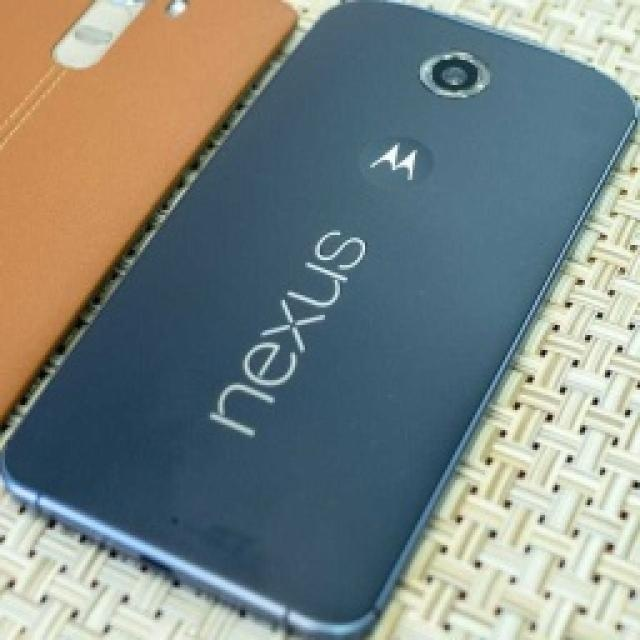


Processing file: Datacluster-Cracked-Screen-239-_jpg.rf.e0bbfc6903b9621a3478169efc125108 (3).jpg
Size: 90873 bytes
Path: /content/Datacluster-Cracked-Screen-239-_jpg.rf.e0bbfc6903b9621a3478169efc125108 (3).jpg

Results saved to /content/runs/detect/predict

===== IMAGE DAMAGE COMPUTATION =====

--- Detection Debug ---
Class:               screen crack
Confidence:          0.9323
Box (x1,y1,x2,y2):   277.5, 334.9, 452.4, 534.0
Box Width:           174.9
Box Height:          199.1
Box Area:            34814.9
Image Size:          640 x 640
Image Area:          409600
Area Fraction:       0.084997
Sqrt Area (boost):   0.291543
Class Weight:        1.0
Damage Contribution: 0.271814
----------------------------

--- Detection Debug ---
Class:               screen crack
Confidence:          0.8761
Box (x1,y1,x2,y2):   201.1, 120.2, 277.6, 171.2
Box Width:           76.5
Box Height:          51.0
Box Area:            3904.8
Image Size:          640 x 640
Image Area:          409600
Area Frac

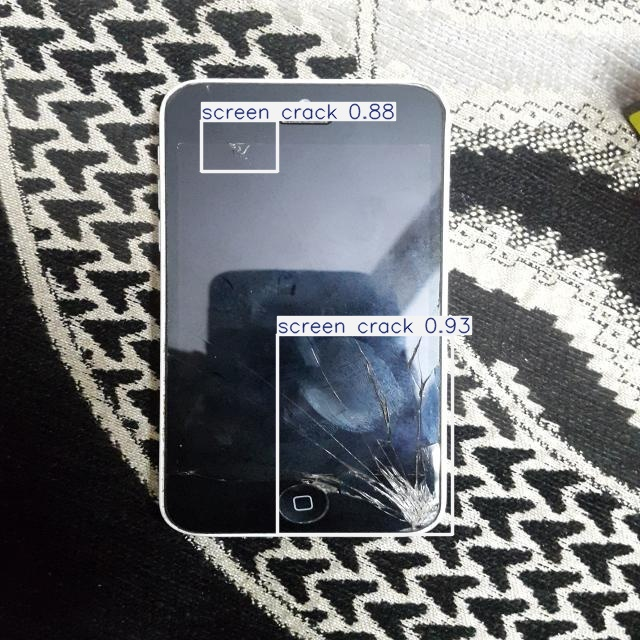


===== PHONE-LEVEL DAMAGE =====
Per-image scores: ['0.000', '0.300']
FINAL PHONE DAMAGE (max): 0.300475

Per-image scores:
  7OGHUKIKUDMG_jpg.rf.e221a33ecc9fc9b4d0b16dd358157c74 (2).jpg: 0.000
  Datacluster-Cracked-Screen-239-_jpg.rf.e0bbfc6903b9621a3478169efc125108 (3).jpg: 0.300

FINAL PHONE DAMAGE SCORE (0–1): 0.300


In [37]:
uploaded = files.upload()
image_damage_scores = {}

for fn in uploaded.keys():
    image_path = os.path.join('/content', fn)
    print(f"\n===============================")
    print(f"Processing file: {fn}")
    print(f"Size: {len(uploaded[fn])} bytes")
    print(f"Path: {image_path}")
    print(f"===============================\n")
    # Run YOLO prediction
    results = model.predict(source=image_path, save=True, conf=0.25, verbose=False)
    if results:
        r = results[0]
        img_h, img_w = r.orig_shape  # (height, width)
        names = r.names              # id -> class name
        detections = []
        if r.boxes is not None:
            for box in r.boxes:
                x1, y1, x2, y2 = box.xyxy[0].tolist()
                cls_id = int(box.cls[0].item())
                conf = float(box.conf[0].item())
                class_name = names[cls_id]

                detections.append({
                    "class_name": class_name,
                    "confidence": conf,
                    "bbox": [x1, y1, x2, y2],
                })
        # Compute damage for this image
        img_score = image_damage(detections, img_width=img_w, img_height=img_h, k=1.0)
        image_damage_scores[fn] = img_score
        print(f"Damage score for {fn}: {img_score:.3f}")
    else:
        print("No inference results for this image.")

    # Show annotated prediction
    if results and hasattr(results[0], 'path'):
        runs_dir = os.path.join(os.getcwd(), 'runs/detect')
        if os.path.exists(runs_dir):
            subdirs = [
                os.path.join(runs_dir, d)
                for d in os.listdir(runs_dir)
                if os.path.isdir(os.path.join(runs_dir, d))
            ]
            subdirs.sort(key=os.path.getmtime, reverse=True)
            if subdirs:
                latest_predict_dir = subdirs[0]
                output_image_name = os.path.basename(image_path)
                output_image_path = os.path.join(latest_predict_dir, output_image_name)
                if os.path.exists(output_image_path):
                    print(f"\nDisplaying detection results for {fn}:")
                    display(Image(filename=output_image_path))
                else:
                    print(f"Output image not found at {output_image_path}")
            else:
                print("No prediction directory found in runs/detect.")
        else:
            print("runs/detect directory does not exist yet.")

if image_damage_scores:
    scores_list = list(image_damage_scores.values())
    final_phone_score = phone_damage(scores_list, method="max")  # or "combined"
    print("Per-image scores:")
    for fn, s in image_damage_scores.items():
        print(f"  {fn}: {s:.3f}")
    print(f"\nFINAL PHONE DAMAGE SCORE (0–1): {final_phone_score:.3f}")
else:
    print("No images scored.")